Step-by-step:

1. Loading modules and dataset
2. Loading czech stop words from external source
3. Quick exploratory 
4. Formating words - removing tags, spec. characters, tokenization, steming(standardization of words to avoid different forms of the same words due to articles, plurals etc.)...
5. Words clouds, general and by most common categories
5. Spliting into train/test set
6. Model - Multinomial Naive Bayes - simple model, but very fast and tend to perform relative well on text structure datasets - based on Bayes theorem - calcualting prob. of an event occurring based on the prior knowledge of conditions related to this event
7. Evaluation of model

What could be done better/further:

1. To play with topics modeling - mainly for Perex (LDA, NMF...)
2. To deploy more advanced alghoritms 
3. To use also Perex to improve model performance
4. To merge some categories together - the least frequent ones

Results:

Most frequent words in titles are for football: gól, Spart; hockey: NHL, gól; tennis: Plišková, Kvitová; F1: Ferrari, Hamilton
-> hence, titles reflects the most famous clubs/stars in given sports

Acc.: 78%
Weighted F1: 77% - nicely balanced precision and recall

-> satisfying results, considering only titles were deployed and no advanced black-box models used 

In [64]:
#libraries import

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

In [1]:
#dataset load

df = pd.read_csv('C:/Users/baumg/Desktop/cv/seznam/sportoclanky.csv')

NameError: name 'pd' is not defined

In [67]:
#loading czech stop-wrods

my_file = open("C:/Users/baumg/Desktop/cv/seznam/stop_words_czech.txt", "r",encoding="utf8")

stop_words = my_file.read()
  
stop_words = stop_words.split("\n")
print(stop_words)
my_file.close()

['ačkoli', 'ahoj', 'ale', 'anebo', 'ano', 'asi', 'aspoň', 'během', 'bez', 'beze', 'blízko', 'bohužel', 'brzo', 'bude', 'budeme', 'budeš', 'budete', 'budou', 'budu', 'byl', 'byla', 'byli', 'bylo', 'byly', 'bys', 'čau', 'chce', 'chceme', 'chceš', 'chcete', 'chci', 'chtějí', 'chtít', "chut'", 'chuti', 'co', 'čtrnáct', 'čtyři', 'dál', 'dále', 'daleko', 'děkovat', 'děkujeme', 'děkuji', 'den', 'deset', 'devatenáct', 'devět', 'do', 'dobrý', 'docela', 'dva', 'dvacet', 'dvanáct', 'dvě', 'hodně', 'já', 'jak', 'jde', 'je', 'jeden', 'jedenáct', 'jedna', 'jedno', 'jednou', 'jedou', 'jeho', 'její', 'jejich', 'jemu', 'jen', 'jenom', 'ještě', 'jestli', 'jestliže', 'jí', 'jich', 'jím', 'jimi', 'jinak', 'jsem', 'jsi', 'jsme', 'jsou', 'jste', 'kam', 'kde', 'kdo', 'kdy', 'když', 'ke', 'kolik', 'kromě', 'která', 'které', 'kteří', 'který', 'kvůli', 'má', 'mají', 'málo', 'mám', 'máme', 'máš', 'máte', 'mé', 'mě', 'mezi', 'mí', 'mít', 'mně', 'mnou', 'moc', 'mohl', 'mohou', 'moje', 'moji', 'možná', 'můj', 'musí

In [7]:
df.shape

(111218, 3)

In [13]:
df.head()

,category,rss_title,rss_perex
0,biatlon,"Krčmář dojel v hromadném závodě devátý, díky s...",Závod s hromadným startem v německém Oberhofu ...
1,biatlon,Česká vlajka byla v Pokljuce vidět i ve štafet...,Galerie
2,biatlon,Živě: Stíhací závod biatlonistek v Ruhpoldingu,"15. 1., 14:45"
3,fotbal,Bakoš dostal herdu do nosu a v zápase plném ka...,Slovenský útočník Marek Bakoš zařídil Plzni gó...
4,fotbal,"My moc chtěli a Plzeň moc nechtěla, zní z Ďolí...",Český fotbal hledá viníka skandálu odloženého ...


In [8]:
df.info

<bound method DataFrame.info of        category                                          rss_title  \
0       biatlon  Krčmář dojel v hromadném závodě devátý, díky s...   
1       biatlon  Česká vlajka byla v Pokljuce vidět i ve štafet...   
2       biatlon     Živě: Stíhací závod biatlonistek v Ruhpoldingu   
3        fotbal  Bakoš dostal herdu do nosu a v zápase plném ka...   
4        fotbal  My moc chtěli a Plzeň moc nechtěla, zní z Ďolí...   
...         ...                                                ...   
111213    tenis  Předstírané zranění i házení mincí. Ve Wimbled...   
111214    tenis  Strýcová suverénně vypráskala Riskeovou, teď j...   
111215  biatlon            ŽIVĚ: Biatlonové MS. Muži jedou štafetu   
111216  biatlon  ŽIVĚ: Bude další medaile? Češky chtějí překvap...   
111217  biatlon    ŽIVĚ: Štafeta žen. Koukalová finišuje o medaili   

                                                rss_perex  
0       Závod s hromadným startem v německém Oberhofu ...  
1      

In [10]:
df.describe()

,category,rss_title,rss_perex
count,111218,111218,111218
unique,24,99524,93319
top,fotbal,Karolína Plíšková,Galerie
freq,45891,102,247


In [68]:
df.isnull().sum()

category     0
rss_title    0
rss_perex    0
dtype: int64

In [24]:
df.category.value_counts()

fotbal            45891
hokej             28775
tenis             11437
formule1           5733
moto               4813
atletika           2552
basketbal          2492
cyklistika         2048
biatlon            1526
olympijske_hry     1322
lyze_snowboard      957
volejbal            838
hazena              666
vodni_sporty        601
florbal             527
golf                455
box                 149
baseball            143
krasobrusleni        77
rychlobrusleni       65
dostihy              56
rugby                46
futsal               43
hokejbal              6
Name: category, dtype: int64

In [69]:
#response variable factorization

df['CategoryId'] = df['category'].factorize()[0]
df.head()

,category,rss_title,rss_perex,CategoryId
0,biatlon,"Krčmář dojel v hromadném závodě devátý, díky s...",Závod s hromadným startem v německém Oberhofu ...,0
1,biatlon,Česká vlajka byla v Pokljuce vidět i ve štafet...,Galerie,0
2,biatlon,Živě: Stíhací závod biatlonistek v Ruhpoldingu,"15. 1., 14:45",0
3,fotbal,Bakoš dostal herdu do nosu a v zápase plném ka...,Slovenský útočník Marek Bakoš zařídil Plzni gó...,1
4,fotbal,"My moc chtěli a Plzeň moc nechtěla, zní z Ďolí...",Český fotbal hledá viníka skandálu odloženého ...,1


In [70]:
category = df[['category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,category,CategoryId
0,biatlon,0
3,fotbal,1
25,hokej,2
43,moto,3
44,atletika,4
46,cyklistika,5
47,tenis,6
56,formule1,7
163,volejbal,8
168,basketbal,9


In [71]:
#selecting top 4 sports 

fotbal = df[df['CategoryId'] == 1]
hokej = df[df['CategoryId'] == 1]
tenis = df[df['CategoryId'] == 2]
formule1 = df[df['CategoryId'] == 7]

In [73]:
#removing tags

import re

def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
df['rss_title'] = df['rss_title'].apply(remove_tags)
df['rss_perex'] = df['rss_perex'].apply(remove_tags)

In [74]:
#removing spec characters

def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df['rss_title'] = df['rss_title'].apply(special_char)
df['rss_perex'] = df['rss_perex'].apply(special_char)

In [75]:
#converting all letters to lower

def convert_lower(text):
   return text.lower()
df['rss_title'] = df['rss_title'].apply(convert_lower)
df['rss_perex'] = df['rss_perex'].apply(convert_lower)
df['rss_title'][1]

'česká vlajka byla v pokljuce vidět i ve štafetách  na medaile to ale nestačilo'

In [76]:
#tokenization of words

from nltk.tokenize import word_tokenize 

def remove_stopwords(text):
  stop_words1 = stop_words
  text_tokens = word_tokenize(text)
  return [word for word in text_tokens if word not in stop_words1]
df['rss_title'] = df['rss_title'].apply(remove_stopwords)
df['rss_title'][1]
df['rss_perex'] = df['rss_perex'].apply(remove_stopwords)
df['rss_perex'][0]


['závod',
 'hromadným',
 'startem',
 'německém',
 'oberhofu',
 'českých',
 'biatlonistů',
 'nejvíc',
 'vyšel',
 'michalu',
 'krčmářovi',
 'nakonec',
 'prodral',
 'deváté',
 'místo',
 'ondřej',
 'moravec',
 'dojel',
 'třináctý',
 'michal',
 'šlesingr',
 'devětadvacátý',
 'vítězství',
 'slaví',
 'němec',
 'simon',
 'schempp',
 'zazářil',
 'senzačním',
 'finišem']

In [77]:
#words stemming

import simplemma
langdata = simplemma.load_data('cs')

def stem_word(text):
  stemmed_words=[simplemma.lemmatize(t, langdata) for t in text]    
  return " ".join(stemmed_words)
df['rss_title'] = df['rss_title'].apply(stem_word)
df['rss_title'][1]
df['rss_perex'] = df['rss_perex'].apply(stem_word)
df['rss_perex'][0]

'závod hromadný start německý oberhofu český biatlonistů nejvíce vyjít michalu krčmář nakonec prodral devátý místo Ondřej Moravec dojel třináctý Michal šlesingr devětadvacátý vítězství slavit Němka Simona schempp zazářil senzační finišem'

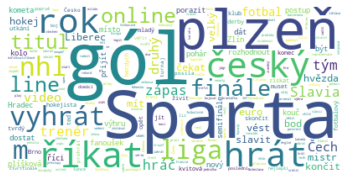

In [106]:
#WORD CLOUDS

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate((" ").join(df.rss_title))

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

fotbal


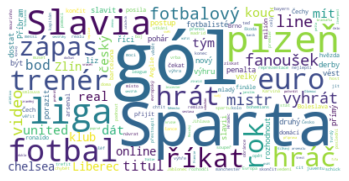

hokej


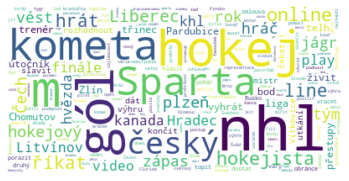

tenis


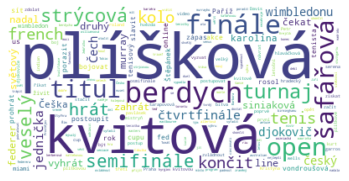

formule1


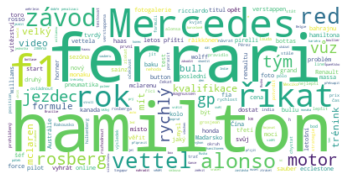

In [107]:
for var in ['fotbal', 'hokej', 'tenis', 'formule1']:
    dataset=df[df['category'] == var]
    word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate((" ").join(dataset.rss_title))

    # Display the generated Word Cloud

    plt.imshow(word_cloud2, interpolation='bilinear')

    plt.axis("off")
    print(var)
    plt.show()

In [88]:
#Spliting into train and test set


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# pull the data into vectors
vectorizer = CountVectorizer(max_features = 1000)
x = vectorizer.fit_transform(df['rss_title'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88974, 1000)
(88974,)
(22244, 1000)
(22244,)


In [90]:
x_train

<88974x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 373475 stored elements in Compressed Sparse Row format>

In [91]:
#Model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [92]:
#acc.
nb.score(x_test, y_test)

0.7800755259845351

In [93]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
x_test_pred = nb.predict(x_test)
confusion_matrix(y_test, x_test_pred)

array([[ 160,   82,   29,   13,   10,    6,    4,    3,    0,    1,    0,
           0,    8,    0,    0,    0,    0,    2,    0,    0,    0,    0,
           0,    0],
       [   5, 8486,  470,   44,   17,    5,   46,   48,    8,   15,    5,
          11,   10,    0,    0,    2,    8,    6,    0,    0,    1,    0,
           0,    0],
       [  15, 1021, 4541,   23,   32,    6,   54,   31,   10,   20,    7,
          15,    9,    0,    0,    2,    3,    3,    0,    2,    0,    0,
           0,    0],
       [   5,  259,   62,  432,   12,    6,   18,  126,    0,    0,    0,
           2,    4,    0,    0,    1,    0,    2,    0,    0,    0,    0,
           0,    0],
       [   5,  147,   25,   23,  223,    5,   18,    5,    0,    1,    0,
          27,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   9,  102,   28,   13,    8,  213,    2,    7,    0,    0,    0,
           6,    8,    0,    0,    0,    0,    2,    0,    0,    0,    0,
       

In [95]:
#Metrics


from sklearn.metrics import classification_report
print(classification_report(y_test, x_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59       318
           1       0.76      0.92      0.84      9187
           2       0.83      0.78      0.81      5794
           3       0.66      0.47      0.55       929
           4       0.56      0.46      0.51       482
           5       0.79      0.54      0.64       398
           6       0.89      0.84      0.86      2319
           7       0.76      0.73      0.74      1128
           8       0.69      0.33      0.45       180
           9       0.80      0.46      0.59       497
          10       0.54      0.17      0.25        90
          11       0.46      0.41      0.43       258
          12       0.45      0.20      0.28       210
          13       1.00      0.04      0.07        28
          14       0.00      0.00      0.00        24
          15       0.59      0.20      0.29        87
          16       0.70      0.24      0.35       131
          17       0.32    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
